<div class="alert alert-block alert-info" >
    <h1>Robot Perception</h1>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.<br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line. </p>
    <br>The server resource is limited to 2 core cpu and 1GB RAM at max per user. If you use more than that, the kernel may die. Nevertheless, you can bring it up again by restaring the kernel (Kernel -> Restart and clear output).<br>
    <h3>Submission:</h3>
    <p>Upload all attachments required to run the notebook and provide a correct path to them.</p>
    <p><strike>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit)</strike>.</p> 
    <p>Starting from RP-HW07 onwards, submit the notebook and pdf version of it via LEA.</p>
    <p>The assignments are due on <b>Monday at 0:00.</b> (i.e. Sunday 23:59 + 1 min)</p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

<div class="alert alert-block alert-danger">
<p><b>Put your answer in the PROVIDED CELLS only!</b></p>
<b>Any new cell is not visible during the grading.</b>
<p>We provide additional code and markdown cells for each question, so that you do not have to add the new ones.</p>
<p>Do not copy the metadata from one cell to another as it is unique to that cell only.</p></div>

In [ ]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend this list if necessary.
'''
member1 = ''
member2 = ''


## Q&As: Pose three questions (and ans.) to last lecture, 3 Q&As per member [1 point]

The format of the question and answer should be [Q1,A1,Q2,A2,Q3,A3,...,Qn,An], where Q1 is the question and A1 is the answer.<br>
If you work in a group, the total of the Q&As is $3xn$, where $n$ is the total number of members.<br>

Put your answer in the provided cell below!<br>
If you work in a group, you can extend the provided Q&A template, but please use the same format:
1. Q and A are separated by ONE $<$br$>$
2. Q&A and other Q&As are separated by TWO $<$br$>$

Or copy the provided format in the answer cell, and change the Q&A number.
<br>
Do not remove any markdown tag like $<$br$>$ in the answer cell.

YOUR ANSWER HERE
<br>
Q1 = Your first question here!
<br>
A1 = Your Q1 answer here!
<br>
<br>
Q2 = Your second question here!
<br>
A2 = Your Q2 answer here!
<br>
<br>
Q3 = Your third question here!
<br>
A3 = Your Q3 answer here!

In [ ]:
'''
Provide the time required to solve the assignment per task as well as the sum (in minutes).
Extend this list if needed.
'''

Task1 = 0
Task2 = 0
Task3 = 0
Sum = 0


## Task1: CameraCalibration using SURF and automatic point pairs

#### Your tasks are:

a. Run Feature extraction (SURF or SIFT) on `images/20150616_074411.jpg` and `images/20150616_07444.jpg`, display the found features. 

`NOTE: both images have lens distortion, thus they are NOT calibrated.`

b. Run features MATCHING on those point sets, filter out only the "good" ones!

c. Use the match point set to run a camera Calibration and find the intrinsic parameters. Undistort the images. compare to the included files `*Calibrated.jpg`

d. I produced some point correspondences by hand myself see files (`shelf0Points.csv and shelfrrPoints.csv`). Redo Calibration using THESE point correspondences. Compare the results!

In [41]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('./images/20150616_074411.jpg')
img2 = cv2.imread('./images/20150616_074444.jpg')

img_size = (img1.shape[1], img1.shape[0])

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

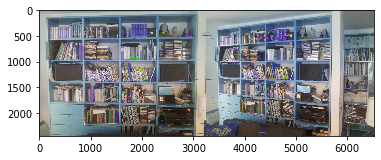

(<matplotlib.image.AxesImage at 0x1ba26acd9c8>, None)

In [76]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
good_matches = []
pts1 = []
pts2 = []
for m,n in matches:
    if m.distance < 0.4*n.distance:
        good_matches.append(m)
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [78]:
board_height = 8
board_width = 6
N = 2 #Number of images
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)


def filter_matches_by_fundamental_matrix(key_pts1, key_pts2, matches, threshold):
    N = len(matches)
    i = 0

    for i,m in enumerate(matches):
        pts2.append(key_pts2[i])
        pts1.append(key_pts1[m.queryIdx].pt)
        
    src_pts = np.array(pts1)
    dst_pts = np.array(pts2)

    N = len(matches)
    [H, mask] = cv2.findFundamentalMat(src_pts, dst_pts, cv2.FM_RANSAC, threshold)

    mask = np.nonzero(np.reshape(mask, (-1)))[0]
    return [matches[i] for i in mask]

filtered_matches = filter_matches_by_fundamental_matrix(kp1,kp2,good_matches,2)

TypeError: points2 data type = 17 is not supported

In [74]:
# YOUR CODE HERE
print(len(filtered_matches))

27


YOUR ANSWER HERE

## Task2: Use some point correspondences to draw epipolar lines INTO the pictures as overlays. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Task3: Given the image `shelf0CalibratedwithLines.jpg` and the points as below. 

#### Assumptions:
* The distance 11-12 is 125 cm in reality
* The horizontal line is given by points 13 and 14 which lie on the horizontal line.

#### Your tasks are:

a. Calculate (in Python) in any way you can think of the distance between 5-7 in cm! (sanity check: ground truth is 32,7cm).

b. Estimate the error (in cm).

c. Explain what mainly caused the error?.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE